# Biomolecular Interactions

## Practical session P02 - Docking with PyDock

### Introduction

Protein-protein interactions lie at the heart of cellular control mechanisms. Protein molecules in the cell interact either permanently or transiently. Many types of chemical interactions are involved in a protein-protein complex; knowing this interaction can help us understand how many of the biochemical processes involving these proteins are regulated.

In this practice session we will employ the docking software PyDock. We will follow the installation steps, and use it to dock two protein partners.  We will repeat the docking procedure using experimental information about which residues pertaing to the protein-protein complex interface. While the docking commands will be run using the terminal, we will load the output files in this notebook to make analyse the docking results.

### Getting PyDock

The pyDock program needs an Academic License, and therefore pyDock is only distributed by requesting it. You need to ask for a copy of the program at the following link:

https://life.bsc.es/pid/pydock/get_pydock.html

We will put the downloaded pyDock copy into the programs/pyDock directory.

### Installing PyDock

One you have a copy of the pyDock program we can proceed to installing it in our computer. To make the docking calculations pyDock uses either FTDock or ZDOCK external programs. In this ocassion, we will procede to install the FTDock program first. FTDock, in turn, depends on the FFTW2.1 library.


#### Installing FFTW2

In the ./programs/fftw2 folder there is a compresed file, called:

fftw-2.1.5.tar.gz

We decompress it by executing:

```
cd programs/fftw2/
gunzip fftw-2.1.5.tar.gz
tar xvf fftw-2.1.5.tar
```

Then we enter the newly created folder, fftw-2.1.5, and compile this library with:

```
./configure --enable-float
make
```

One it has finished we copy the absolute path to the fftw-2.1.5 folder:

```
pwd
```

#### Installing FTDock

We can now install FTDock. For that, we navigate to the containing folder:

```
cd ../..
cd FTDock
```

We uncompress the gnu_licensed_3D_Dock.tar file:

```
tar xvf gnu_licensed_3D_Dock.tar
```

We enter the following folder and edit the Makefile:

```
cd 3D_Dock/progs/
```

For Ubuntu:

```
gedit Makefile
```

For Mac:

```
open -t file.txt
```

We change the following lines:

1) in the FFTW_DIR line, define the full path of the fftw-2.1.5 directory
2) in the CC_FLAGS line, remove the -malign-double argument.
3) in the CC_FLAGS line, define -mcpu=k8

Then we compile the program:

```
make
```

Finally, we get the path to this folder so we can tell to pyDock where to find the program.

```
cd ..
pwd
```


#### Installing pyDock

We finally install pyDock, for that we navigate to the folder where the program is located:

```
cd ../..
cd pyDock
```

We uncompress the file:

```
tar xvf pyDock3.tgz.tar
```

We edit the pyDock configuration file, in the etc folder, to give it the path to the FTDOCK program:

1) in the FTDOCK= line, define the full path of the 3D_Dock directory

```
cd pyDock3
```

For Ubuntu:

```
gedit etc/pydock.conf
```

For Mac:

```
open -t etc/pydock.conf
```

We get the path to the pyDock3 executable:

```
pwd
```

and we enter this path at the end of the .bashrc file:

For Ubuntu:

```
gedit ~/.bashrc
```

For Mac:

```
open -t ~/.bashrc
```

the line is : 

export PATH=\\$PATH:"Path_to_pyDock3"

where, "Path_to_pyDock3", is the previous path. 

To source again the .bashrc file we can use:

```
source  ~/.bashrc
```

or simply open a new terminal.

### Running pyDock with FTDOCK

#### Defining the partners file

In the input directory we have two separate protein partners (pdb files) that we will dock:

1C5K.pdb, the Tol-Pal system protein TolB

and 

1OAP.pdb, the Peptidoglycan-associated lipoprotein (Pal) protein.

We can open in chimera to see the relative orientation of the chains.


#### Edit the configuration file

PyDock uses one protein as a fixed (receptor) protein , and the other movable (ligand) protein. We need to edit the configuration file T26.ini to give the names of the files that will be the receptor and the ligand molecules. 

For Ubuntu:

```
gedit input/T26.ini
```

For Mac:

```
open -t input/T26.ini
```

#### Run the docking calculation

To run the docking we will copy the files into a newly created folder:

```
mkdir docking
cp input/* docking
```

In the new folder we will run the configuration scripts as follow:

```
cd docking
```

```
pyDock3 T26 setup
```

The T26 is the prefix we will use for our calculations. Here is the prefix used by pyDock to read the .ini configuration file.

After executing this command in the docking folder, there will be many new files created:


- T26_lig.pdb       :  Ligand PDB file
- T26_lig.pdb.amber :  AMBER parameters for each atom in the ligand PDB structure
- T26_lig.pdb.H     :  Ligand PDB file with hydrogens
- T26_rec.pdb       :  Receptor PDB file
- T26_rec.pdb.amber :  AMBER parameters for each atom in the receptor PDB structure
- T26_rec.pdb.H     :  Receptor PDB file with hydrogens

FTDOCK expects to find the PDB files with extension .parsed, thus we just copy the receptor and ligand pdb files to create a ".parsed" named version:

```
cp T26_lig.pdb T26_lig.parsed
cp T26_rec.pdb T26_rec.parsed
```

After copying the files we execute:

```
pyDock3 T26 ftdock
```

This will sample the protein docking conformations using Fast Fourier Transform (FFT) methods, and can can take several minutes to finish. The output will be stored in the 


#### Transform the FTDOCK output to rotational and translation matrix

For each conformation, we need to transform the output data from FTDOCK (T26.ftdock), in which each solution is represented by the cartesian position of the ligand and the rotation based on Euler angles, to the rotation and translation matrix that transforms the original ligand into the conformations generated by FTDOCK.

To run this we will execute:

```
pyDock3 T26 rotftdoc
```

The calculation is fast and creates a T26.rot file with the transformation matrices for all the produced docking poses.

####  Scoring using the pyDock energy function

In order to exemplify the socring calculation we will only employ a 100 docked poses, although you can find full scored outputs in the output folder.

First, we back up the .rot file:

```
cp T26.rot T26.rot.original
```

Then, we extract only 100 lines from the file using sed:

```
sed -n -e '11,110p' T26.rot.original > T26.rot
```

Then, for the scoring we ran:

```
pyDock3 T26 dockser  > dockser.log  &
```

After the calculation is finished it will produce an energy file called T26.ene, we can read that file to see its output:

In [1]:
with open('docking/T26.ene') as enef:
    for l in enef:
        print(l)

        Conf         Ele      Desolv         VDW       Total        RANK

------------------------------------------------------------------------

         110     -14.851      -6.324      60.971     -15.078           1

          48     -13.120      -3.728      52.400     -11.608           2

          62     -18.753       7.649      -4.669     -11.570           3

          20     -18.009       2.118      61.148      -9.776           4

          81      -3.293     -10.031      42.928      -9.031           5

          56      -8.531      -3.961      57.233      -6.769           6

          98     -17.903       6.800      47.073      -6.395           7

         102     -17.413       7.861      45.336      -5.019           8

          64      -5.200      -2.621      29.279      -4.893           9

          47     -10.253       0.589      52.914      -4.373          10

         104     -11.966      -5.053     133.564      -3.662          11

          60     -13.438       9.870  

The meaning of each term is as follows:

    1) Conf: conformation number of the docking pose (same as that in the rot file, last column)

    2) Ele: Electrostatic energy component

    3) Delsov: Desolvation energy component

    4) VDW: Van der Waals energy component (term weighted to 0.1 by default)

    5) Total: Total binding energy (Ele + Desolv + 0.1*VDW)

    6) RANK: conformation rank according to its computed binding energy

We create a function to parse this file as a pandas data frame:

In [2]:
import pandas as pd
import numpy as np

In [3]:
def parseEnergy(energy_file):
    
    scores = {}
    
    # Read the score file
    with open(energy_file) as ef:
        
        # Iterate each line in the file with an index (i)
        for i,l in enumerate(ef):
            
            # From the first line (index=0) extract the terms
            if i == 0:
                terms = l.split()
                
            # From the remaining lines extract the values
            elif not l.startswith('---'):
                
                # Iterate each value with a second index (j)
                for j,value in enumerate(l.split()):
                    
                    # Get the term corresponding to that j index 
                    term = terms[j]
                    
                    # Create an entry in the scores dictionary if the term is not in it. 
                    if term not in scores:
                        
                        # Create a list to store all the values corresponding to this term
                        scores[term] = []
                        
                    # Append the values to each corresponding term list
                    
                    if term == 'Conf' or term == 'RANK':
                        scores[term].append(int(value))
                    else:
                        scores[term].append(float(value))
                        
           
    # Convert to a numpy arrya each list of term values 
    for term in scores:
        scores[term] = np.array(scores[term])
        
    # Convert the dictionary of numpy arrays to a Pandas DataFrame object
    scores = pd.DataFrame(scores)
    
    # Set the index of the data frame as the RANK term
    scores = scores.set_index('RANK')
    
    # Return the data frame
    return scores

Now we this function to read the energy file:

In [4]:
# Read the energy file with our parse function
energies = parseEnergy('docking/T26.ene')

# Print the data frame 
print(energies)

      Conf     Ele  Desolv     VDW   Total
RANK                                      
1      110 -14.851  -6.324  60.971 -15.078
2       48 -13.120  -3.728  52.400 -11.608
3       62 -18.753   7.649  -4.669 -11.570
4       20 -18.009   2.118  61.148  -9.776
5       81  -3.293 -10.031  42.928  -9.031
...    ...     ...     ...     ...     ...
96     100   5.903  11.897  79.366  25.736
97      63   2.484  23.242  14.587  27.185
98     107   2.236  16.373  86.445  27.253
99      38   1.168  19.748  65.437  27.459
100     33   8.853  17.043  43.855  30.281

[100 rows x 5 columns]


In [5]:
import matplotlib.pyplot as plt

With Pandas can quickly make a box plot to see the distribution of values

Text(0, 0.5, 'pyDock energy units')

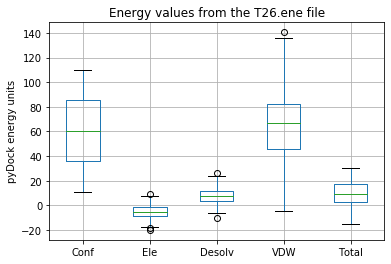

In [6]:
energies.boxplot()
plt.title('Energy values from the T26.ene file')
plt.ylabel('pyDock energy units')

To evaluate the results of the Docking calculation we need to compare it with the known protein complex (The structure is in the native folder) 

To automate the RMSD calculation we are going to employ a Python library that is specialized in analyzing molecular dynamic trajectories (MDTraj). The steps to get the RMSD are as follow:

1) Generate the docking pose's PDB file
2) Load the docking pose's PDB file
3) Load the native pose's PDB file
4) Align the two structure
5) Calculate the RMSD to the native

To extract a specific conformation we use the following command in our docking folder:

```
pyDock3 T26 makePDB rank1 rank2
```

Where, rank1 and rank2 define the range of conformations to extract. 
 
Let's extract the first ranked conformation:

```
pyDock3 T26 makePDB 1 1
```

This commands creates the file T26_conf.pdb, where conf is the index of the first raked conformation. Now we import MDtraj library

In [7]:
import mdtraj as md

We now load the native and this conformation with mdtraj

In [8]:
native = md.load('native/2HQS_native.pdb')
docked = md.load('docking/T26_110.pdb')

print(native)
print(docked)

OSError: No such file: docking/T26_110.pdb

We see tath the docking pose has two residues more than our native structure. We can inspect which residues are missing by aligning the sequences with chimera:


```
chimera 1OAP.pdb 1C5K.pdb ../native/2HQS_native.pdb 
```

the two first residues from 1OAP.pdb are missing from the native file. We identify their indexes from the mdtraj object as the first two residues of the second chain in the docked structure. We save the indexes of the alpha-carbon (CA) atoms for all common residues between the two structures.

In [ ]:
# Save CA indexes of native pdb
native_CA_atoms = []
for chain in native.topology.chains:
    for residue in chain.residues:
        for atom in residue.atoms:
            if atom.name == 'CA':
                native_CA_atoms.append(atom.index)

In [ ]:
# Save CA indexes of docked pdb
docking_CA_atoms = []
for chain in docked.topology.chains:
    for i,residue in enumerate(chain.residues):
        if chain.index == 1 and i in [0,1]:
            continue
        else:
            for atom in residue.atoms:
                if atom.name == 'CA':
                    docking_CA_atoms.append(atom.index)

Now we check that both set of indexes match in number.

In [ ]:
print(len(native_CA_atoms))
print(len(docking_CA_atoms))

Finally, we procede to calculate the RMSD as follow:

In [ ]:
# Slice the trajectories to get only alpha carbon atoms
native_ca = native.atom_slice(native_CA_atoms)
docked_ca = docked.atom_slice(docking_CA_atoms)

# Superimpose docked structure to the native
docked_ca = docked_ca.superpose(native_ca)

# Calculate RMSD between the structures
rmsd = md.rmsd(native_ca, docked_ca)[0]*10 # Convert to angstroms

print(rmsd)

We observe that the RMSD is quite high. We can make a function to automatize the whole process to evaluate the remaining conformations:

In [ ]:
import os

In [ ]:
def appendRMSD(scores, native_traj, docking_directory='docking'):
    
    RMSDs = []
    
    for rank,conf in scores['Conf'].iteritems():
        
        # Extract specific rank PDB 
        os.chdir(docking_directory)
        os.system('pyDock3 T26 makePDB '+str(rank)+' '+str(rank))
        os.chdir('..')
        
        # Load pdb into mdtraj
        docked_pdb = docking_directory+'/T26_'+str(conf)+'.pdb'
        docked = md.load(docked_pdb)
        
        # Remove pdb
        os.remove(docked_pdb)
        
        # Save CA indexes of native pdb
        native_CA_atoms = []
        for chain in native.topology.chains:
            for residue in chain.residues:
                for atom in residue.atoms:
                    if atom.name == 'CA':
                        native_CA_atoms.append(atom.index)
                        
        # Save CA indexes of docked pdb
        docking_CA_atoms = []
        for chain in docked.topology.chains:
            for i,residue in enumerate(chain.residues):
                if chain.index == 1 and i in [0,1]:
                    continue
                else:
                    for atom in residue.atoms:
                        if atom.name == 'CA':
                            docking_CA_atoms.append(atom.index)
        
        # Make sure the number of atoms between docked and native is the same
        assert len(native_CA_atoms) == len(docking_CA_atoms)
        
        # Slice the trajectories to get only alpha carbon atoms
        native_ca = native.atom_slice(native_CA_atoms)
        docked_ca = docked.atom_slice(docking_CA_atoms)

        # Superimpose docked structure to the native
        docked_ca = docked_ca.superpose(native_ca)

        # Calculate RMSD between the structures
        RMSDs.append(md.rmsd(native_ca, docked_ca)[0]*10) # Convert to angstroms
        
        
    scores['RMSD'] = RMSDs
        
    # Add RMSDs to scores array            
    return np.array(RMSDs)

In [ ]:
rmsds = appendRMSD(energies, native)

In [ ]:
# Plot RMSD vs energies
print('Pearson correlations:')
for e in energies:
    if e not in ['RMSD', 'Conf']:
        plt.figure()
        plt.scatter(energies['RMSD'], energies[e])
        plt.title('RMSD vs '+e)
        plt.xlabel('RMSD [angstroms]')
        plt.ylabel(e+' [pyDock energy units]')
        print('\t', e, np.corrcoef(energies['RMSD'], energies[e])[0][1])

For time reasons we have only used a hundred poses, however one typically would run a much higher number of docking trajectories. The output for a 10000 poses run can be found in the output folder. We load the energy files from that file:

In [ ]:
all_energies = parseEnergy('output/T26.ene')

In [ ]:
print(all_energies)

In [ ]:
all_energies.boxplot()
plt.ylim(-60,200)
plt.title('Energy values from the output/T26.ene file')
plt.ylabel('pyDock energy units')

The calculation of the RMSDs to the native configuration for the 10000 poses would also take a couple of hours to caculate, therefore we can read the numpy array containing the corresponding RMSDs from the file T26.rmsds.npy in the output folder. 

In [ ]:
rmsds = np.loadtxt('output/T26.rmsds.npy')

Let's add the rmsds to the 10000 poses energy scores array:

In [ ]:
all_energies['RMSD'] = rmsds.tolist()

We can now depict the conformational landscape explored by the full docking algorithm according to the RMSD to the native configuration, and calculate if there is any correlation between the docked energies and this RMSD:

In [ ]:
# Plot RMSD vs energies
print('Pearson correlations:')
for e in all_energies:
    if e not in ['RMSD', 'Conf']:
        plt.figure()
        plt.scatter(all_energies['RMSD'], all_energies[e])
        plt.title('RMSD vs '+e)
        plt.xlabel('RMSD [angstroms]')
        plt.ylabel(e+' [pyDock energy units]')
        print('\t', e, np.corrcoef(all_energies['RMSD'], all_energies[e])[0][1])

We observe that very few near native conformations are found, but a very big conformational space was explored by the simulation.

### Including experimental restraints in the pyDock energy function scoring

The pyDock energy function failed to identify the near-native conformations, however, if we have experimental data about mutations affecting the interaction between the protein partners, we can include them in the scoring procedure. Let's rescore our poses using the following information inside our T26.ini file:

[receptor]

restr   = A.Hid.147,A.Arg.36


[ligand]

restr   = B.Phe.52

We add this extra lines to our T26.ini file, after the lines appearing in each section. After this, we run the following command to rescore the poses:

```
pydock3 T26 dockrst > dockrst.log &
```

This will create a new file in our docking folder called T26.eneRST. We read that file using our parsing function and make a new boxplot to see our distribution of values

In [ ]:
rst_energies = parseEnergy('docking/T26.eneRST')

In [ ]:
print(rst_energies)

In [ ]:
rst_energies.boxplot()

We add to this data frame the rmsd we have previously calculated

In [ ]:
rst_energies['RMSD'] = energies['RMSD'].tolist()

In [ ]:
# Plot RMSD vs energies
print('Pearson correlations:')
for e in rst_energies:
    if e not in ['RMSD', 'Conf']:
        plt.figure()
        plt.scatter(rst_energies['RMSD'], rst_energies[e])
        plt.title('RMSD vs '+e)
        plt.xlabel('RMSD [angstroms]')
        plt.ylabel(e+' [pyDock energy units]')
        print('\t', e, np.corrcoef(rst_energies['RMSD'], rst_energies[e])[0][1])

We can also read the T26.eneRST file in the output folder, that contains the rescored energy for the 10000 poses:

In [ ]:
rst_all_energies = parseEnergy('output/T26.eneRST')

In [ ]:
print(rst_all_energies)

In [ ]:
rst_all_energies.boxplot()
plt.ylim(-100,200)
plt.title('Energy values from the output/T26.ene file')
plt.ylabel('pyDock energy units')

Finally, we add the RMSDs to this new energy array and recalculate the corrleations between the energies and the RMSDs to the native configuration

In [ ]:
rst_all_energies['RMSD'] = all_energies['RMSD'].tolist()

In [ ]:
# Plot RMSD vs energies
print('Pearson correlations:')
for e in rst_all_energies:
    if e not in ['RMSD', 'Conf']:
        plt.figure()
        plt.scatter(rst_all_energies['RMSD'], rst_all_energies[e])
        plt.title('RMSD vs '+e)
        plt.xlabel('RMSD [angstroms]')
        plt.ylabel(e+' [pyDock energy units]')
        print('\t', e, np.corrcoef(rst_all_energies['RMSD'], rst_all_energies[e])[0][1])